In [ ]:
ls /run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base/arbol_2_fila_G

In [4]:
def hist_stat_h(img):
    img_hsv=skimage.color.rgb2hsv(img)
    imgr=img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001]
    m=np.mean(imgr)
    st=np.std(imgr)
    b,v=np.histogram(imgr.ravel(),bins=100)
    mo=b[np.argmax(v)]
    return m,st,mo

def hist_stat_l(img):
    img_hsv=skimage.color.rgb2lab(img.astype('uint8'))
    imgr=img_hsv[:,:,0].ravel()[np.logical_and(img_hsv[:,:,0].ravel()>0.00001,img_hsv[:,:,0].ravel()<10)]
    m=np.mean(imgr)
    st=np.std(imgr)
    mo=b[np.argmax(v)]
    return m,st,mo

def bl_perc(img):
    img_hsv=skimage.color.rgb2lab(img.astype('uint8'))
    imgr=img_hsv[:,:,0].ravel()[np.logical_and(img_hsv[:,:,0].ravel()>0.00001,img_hsv[:,:,0].ravel()<10)]
    m=(imgr.shape[0])/((img_hsv[:,:,0].ravel()>0.00001).shape)
    return m

#entropy
def entropy_mark(img):
    img=skimage.color.rgb2lab(img.astype('uint8'))[:,:,0]
    ei=(skimage.filters.rank.entropy(img/128,skimage.morphology.disk(5)))>4
    return ei

In [1]:
import os
#import skimage
import torch
from torchvision import transforms
import numpy as np
import glob
from skimage import io
import skimage
import matplotlib.pyplot as plt
from Custom_dataloader import *
from Transforms import sentera_segmentation
from Transforms import entropy_mark_transform
from Transforms import hsv_stats_transfrom
from Transforms import lab_stats_transfrom
from Transforms import black_perc_transfrom
import matplotlib.pyplot as plt

DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
d_t=transforms.Compose([sentera_segmentation(False)])

In [3]:
d_t=transforms.Compose([sentera_segmentation(False)])
tdatab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Trees_fil='*',Intersec=False,transform=d_t)
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Trees_fil='*',Intersec=False)

In [31]:
datab_1_A=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],
                     Trees_col=[1],
                     Trees_fil=['A'],
                     transform=d_t
                    )

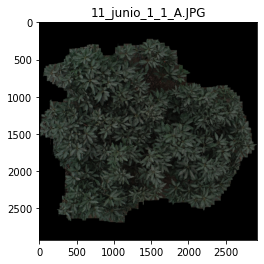

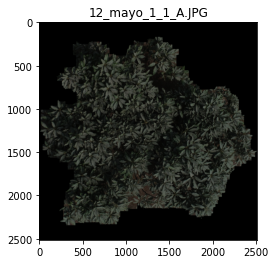

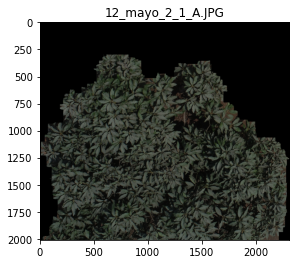

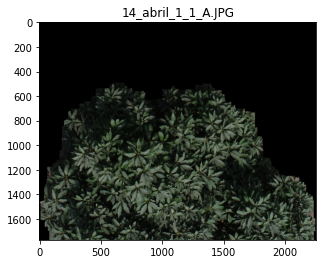

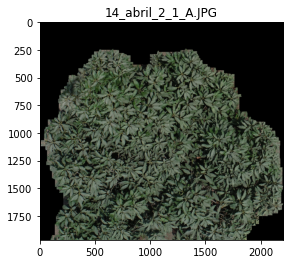

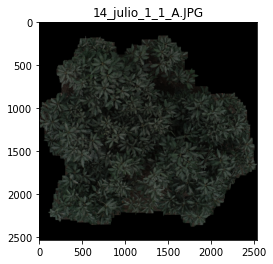

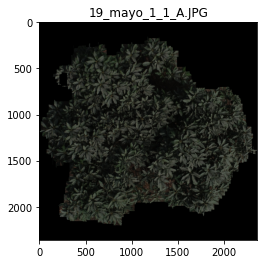

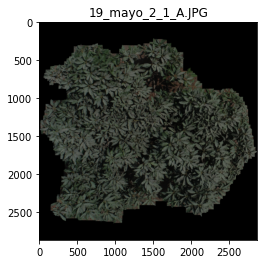

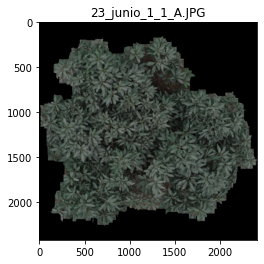

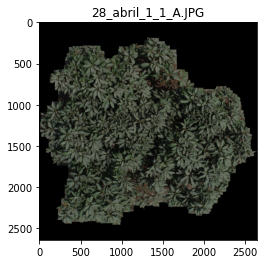

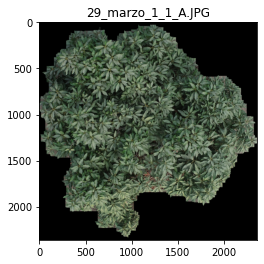

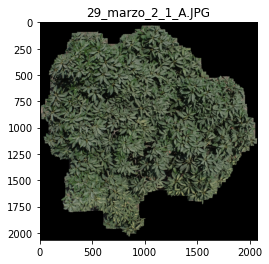

In [19]:
for i in range(len(datab.DATA['PhantomRGB']['Date'])):
    plt.imshow(datab[i]['image'])
    plt.title(datab.aID[i])
    plt.show()
    

In [32]:
datab_21_A=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],
                     Trees_col=[21],
                     Trees_fil=['A'],
                     transform=d_t
                    )

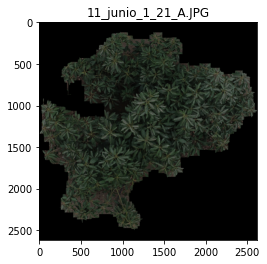

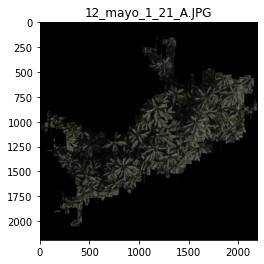

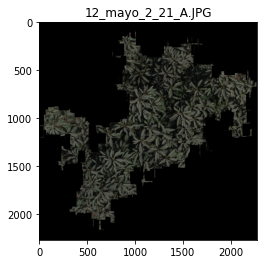

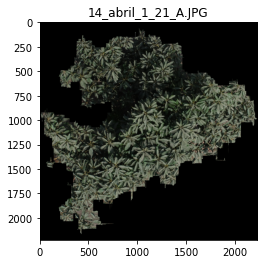

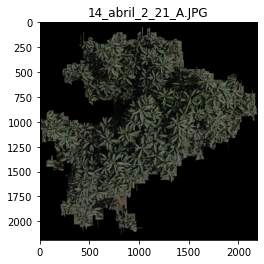

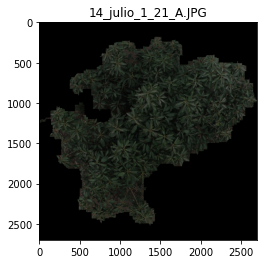

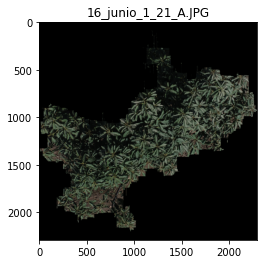

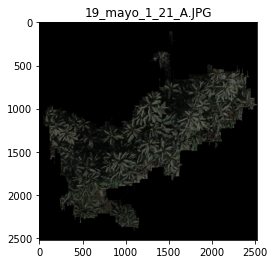

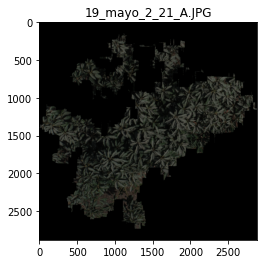

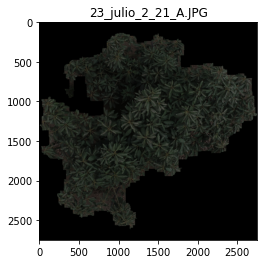

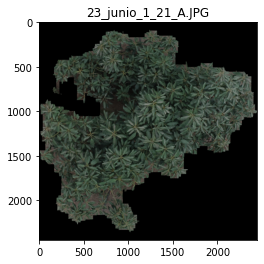

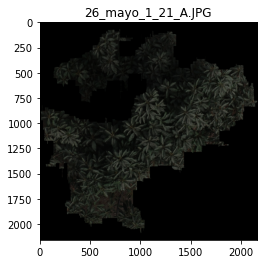

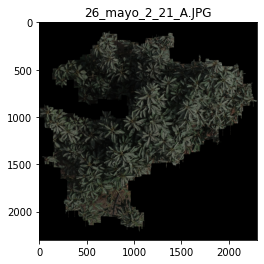

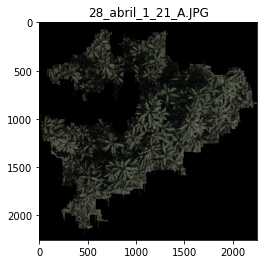

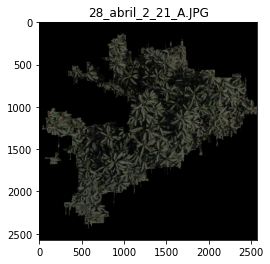

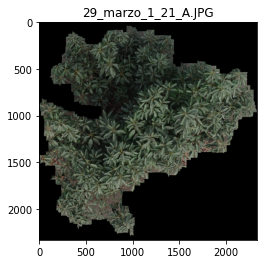

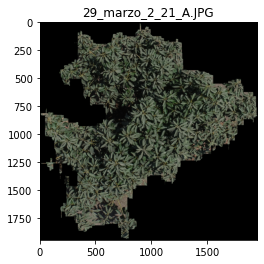

In [18]:
for i in range(len(datab_21_A.DATA['PhantomRGB']['Date'])):
    plt.imshow(datab_21_A[i]['image'])
    plt.title(datab_21_A.aID[i])
    plt.show()

In [40]:
print(datab_21_A.DATA['PhantomRGB']['ID'])
print(datab_1_A.DATA['PhantomRGB']['ID'])

['29_marzo_2_21_A.JPG' '29_marzo_1_21_A.JPG' '14_julio_1_21_A.JPG'
 '23_julio_2_21_A.JPG' '16_junio_1_21_A.JPG' '11_junio_1_21_A.JPG'
 '23_junio_1_21_A.JPG' '28_abril_2_21_A.JPG' '14_abril_1_21_A.JPG'
 '26_mayo_1_21_A.JPG' '12_mayo_1_21_A.JPG' '26_mayo_2_21_A.JPG'
 '12_mayo_2_21_A.JPG' '28_abril_1_21_A.JPG' '14_abril_2_21_A.JPG'
 '19_mayo_1_21_A.JPG' '19_mayo_2_21_A.JPG']
['29_marzo_1_1_A.JPG' '28_abril_1_1_A.JPG' '14_abril_2_1_A.JPG'
 '14_abril_1_1_A.JPG' '29_marzo_2_1_A.JPG' '14_julio_1_1_A.JPG'
 '23_junio_1_1_A.JPG' '11_junio_1_1_A.JPG' '19_mayo_1_1_A.JPG'
 '19_mayo_2_1_A.JPG' '12_mayo_2_1_A.JPG' '12_mayo_1_1_A.JPG']


14_julio_1_1_A.JPG


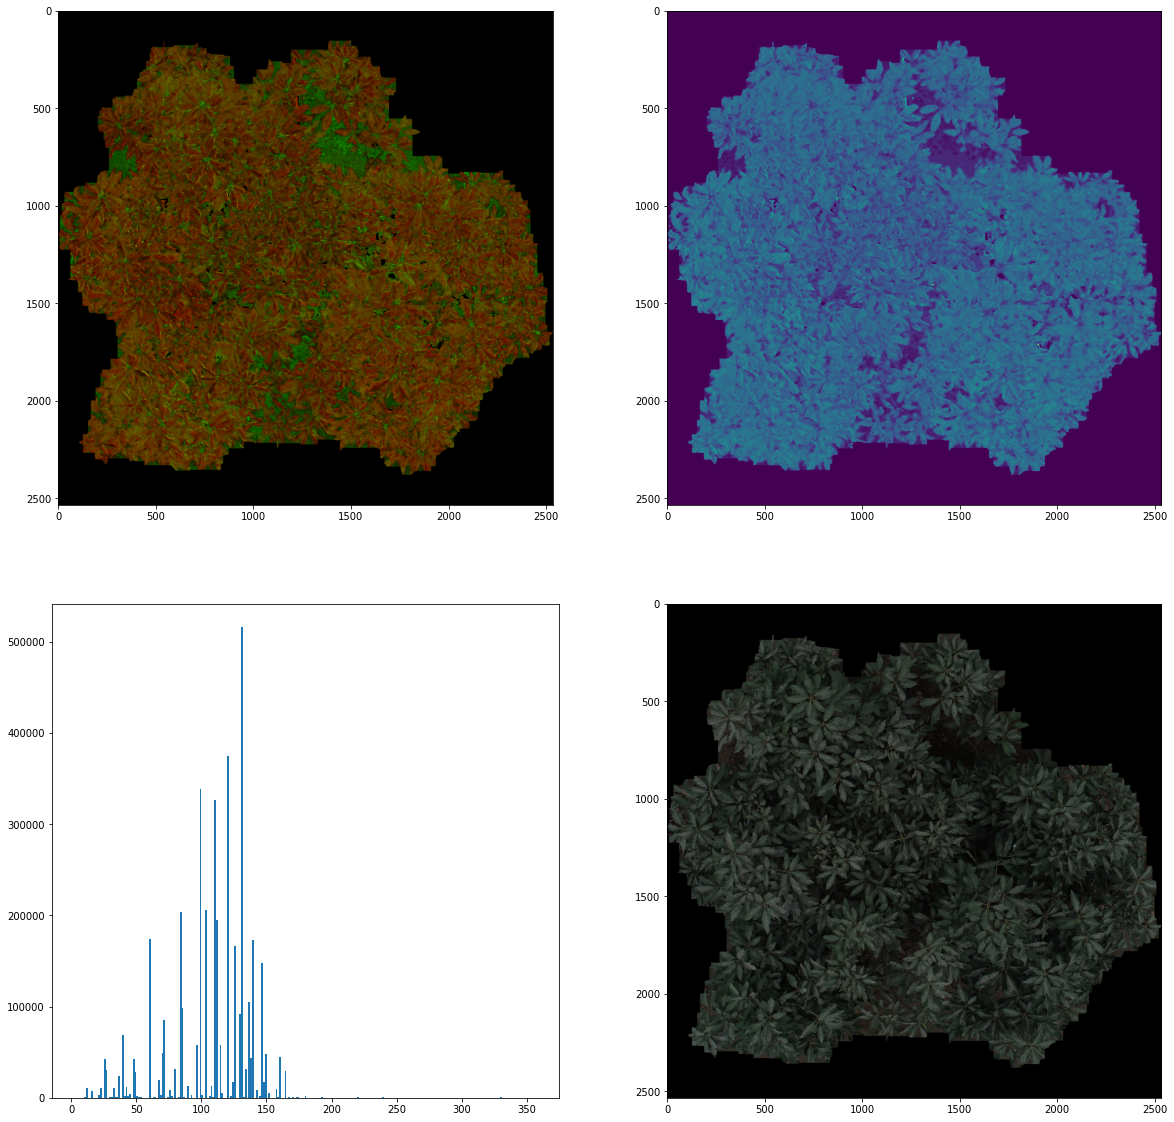

In [42]:
ID=5
img=datab_1_A[ID]['image']

print(datab_1_A.DATA['PhantomRGB']['ID'][ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2hsv(img)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0])
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001]*360,bins=255)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

14_julio_1_21_A.JPG


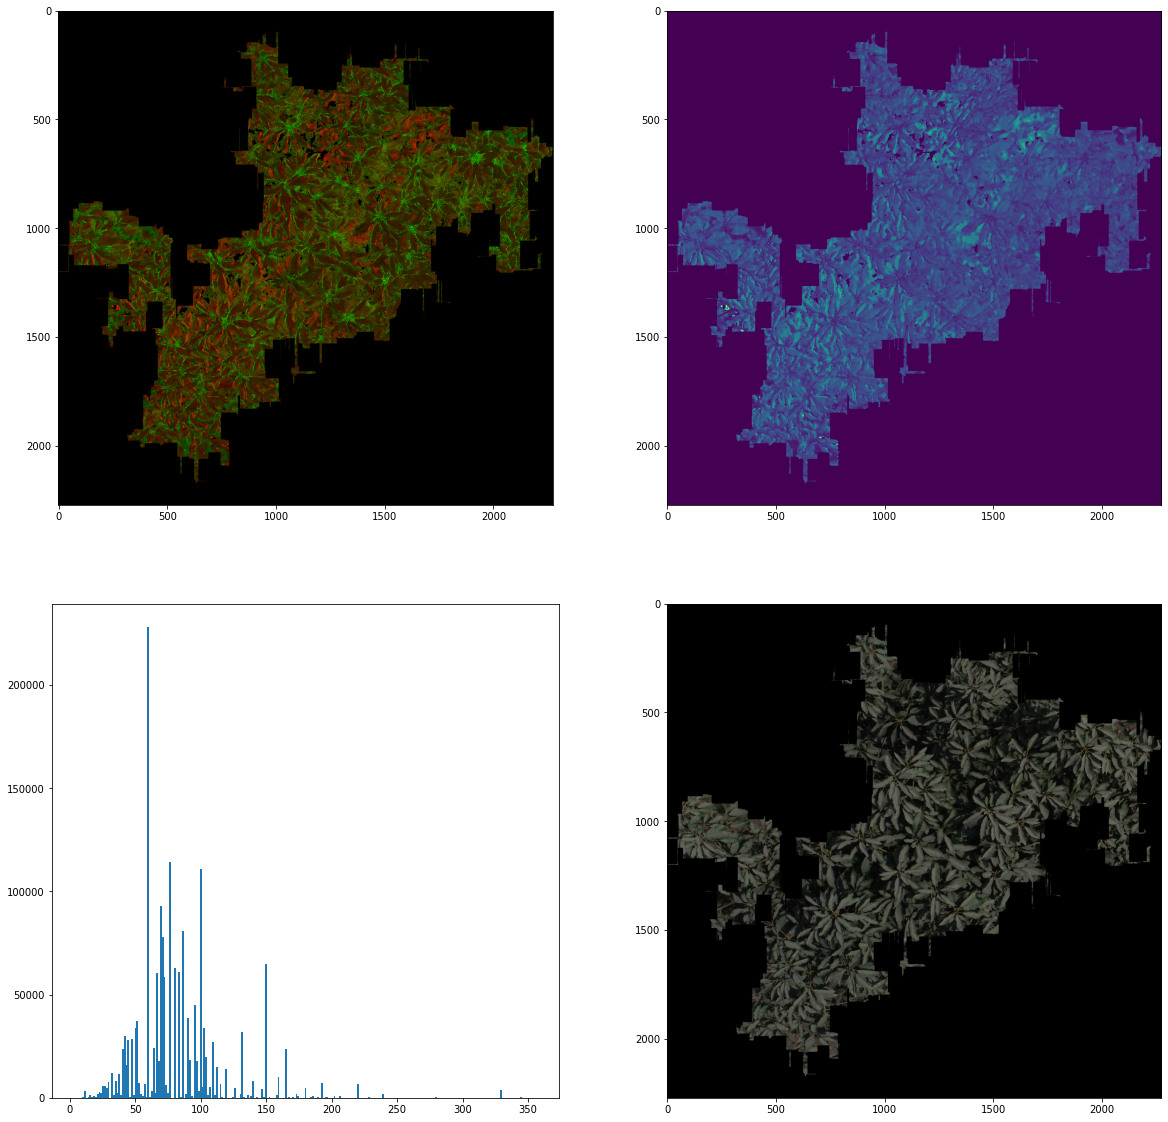

In [43]:
ID=2
img=datab_21_A[ID]['image']

print(datab_21_A.DATA['PhantomRGB']['ID'][ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2hsv(img)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0])
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001]*360,bins=255)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

14_julio_1_1_A.JPG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


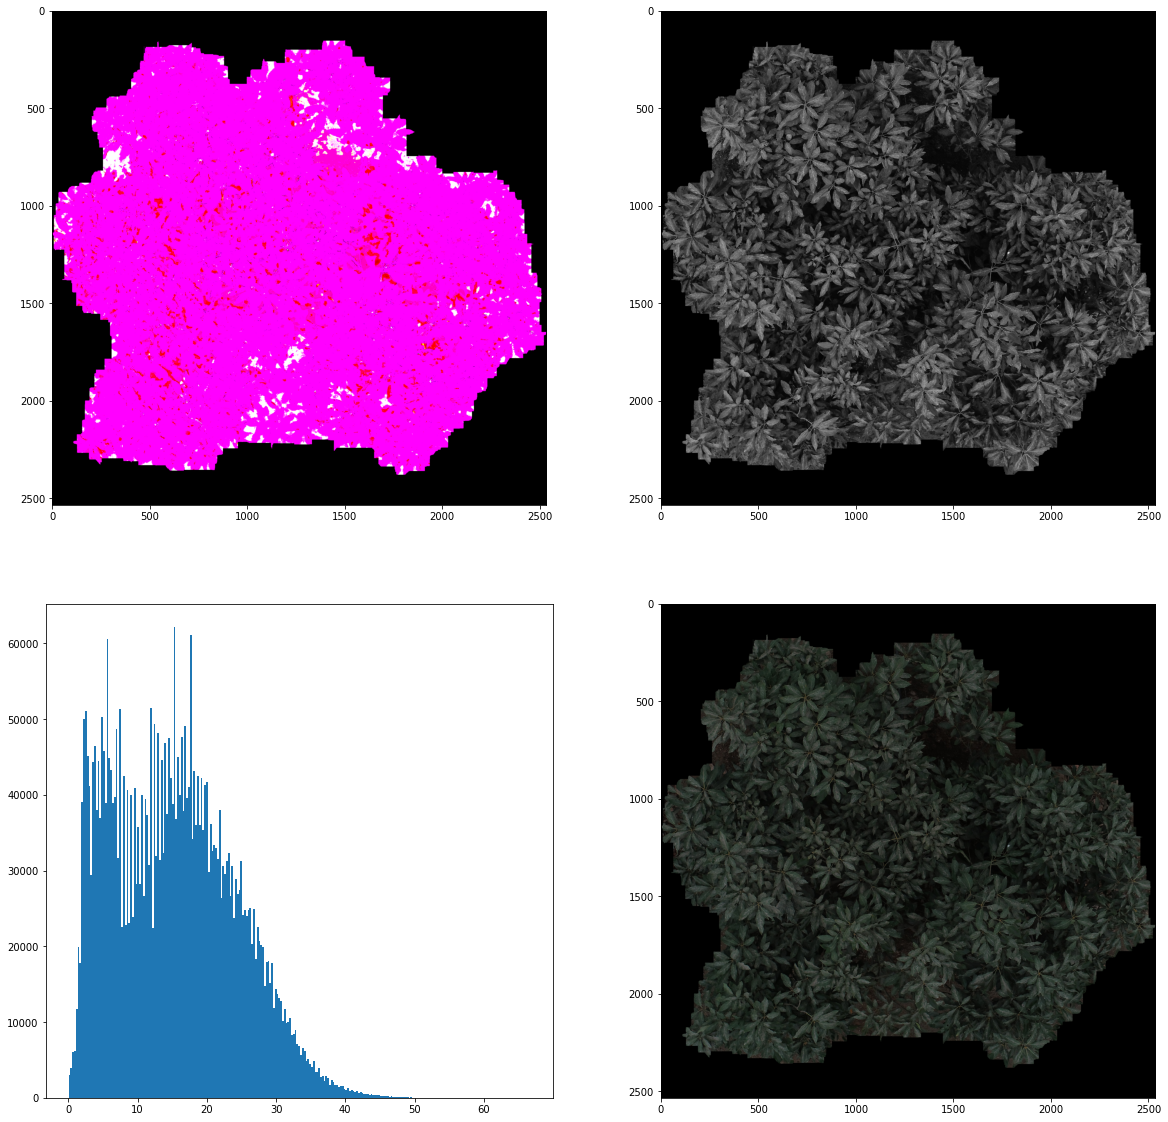

In [79]:
ID=5
img=datab_1_A[ID]['image']

print(datab_1_A.DATA['PhantomRGB']['ID'][ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001],bins=255)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

14_abril_2_1_A.JPG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


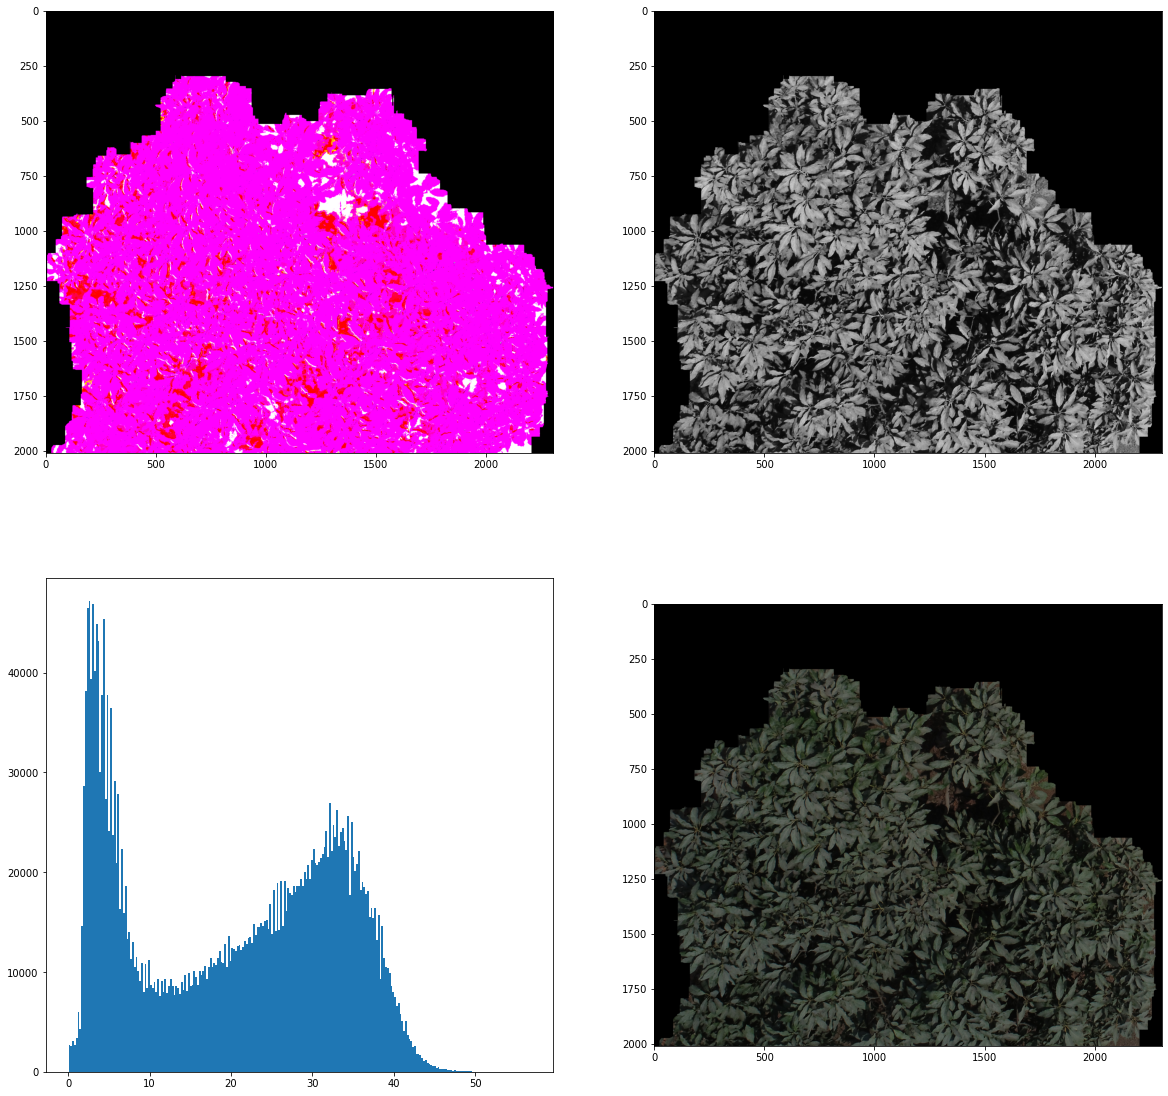

In [95]:
ID=2
img=datab_1_A[ID]['image']

print(datab_1_A.DATA['PhantomRGB']['ID'][ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001],bins=255)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

14_julio_1_21_A.JPG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


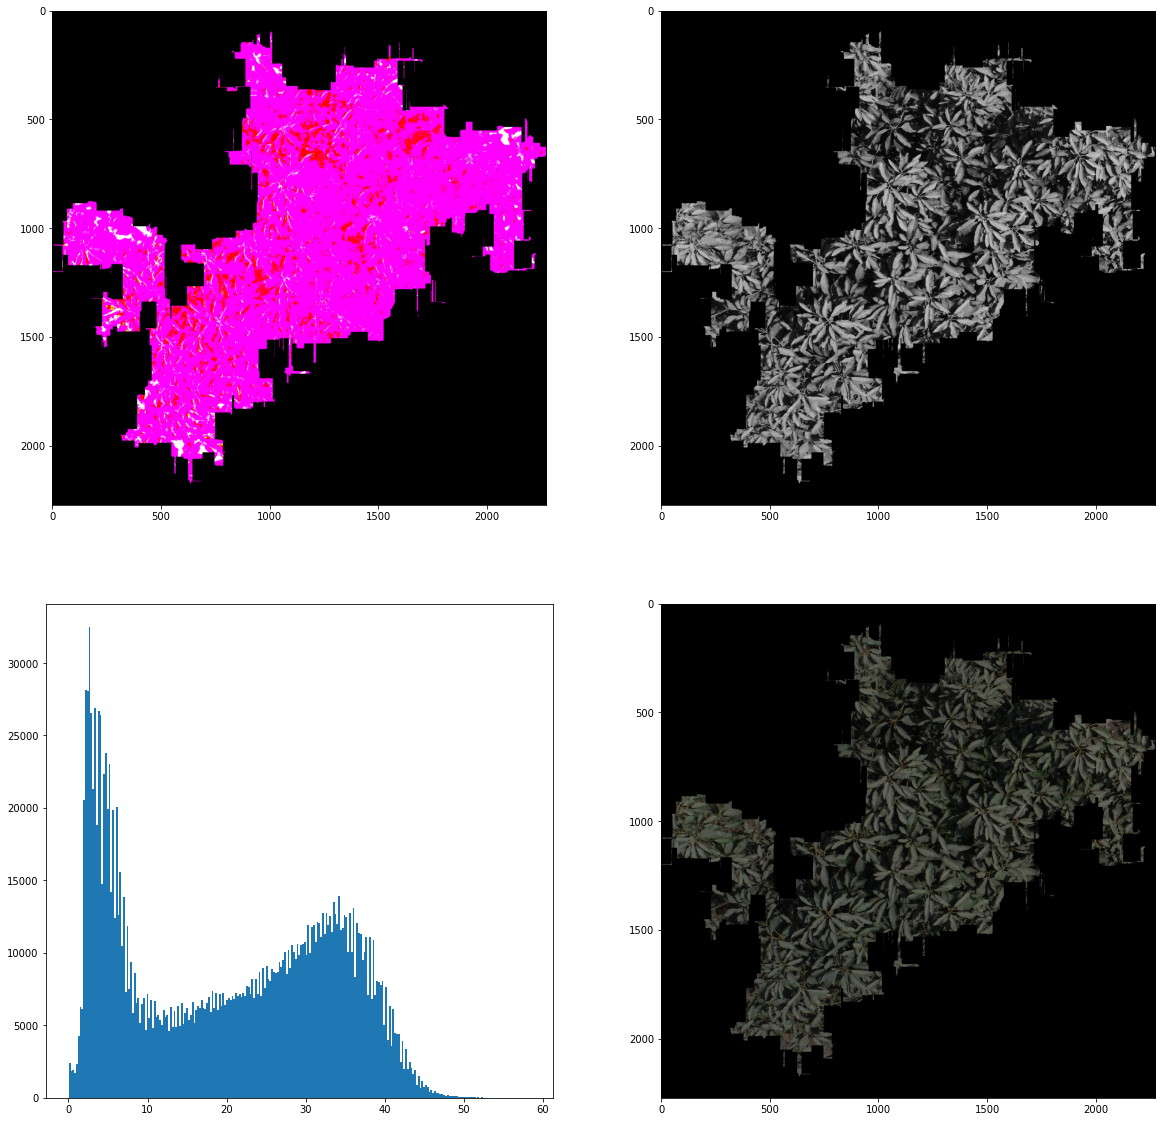

In [78]:
ID=2
img=datab_21_A[ID]['image']

print(datab_21_A.DATA['PhantomRGB']['ID'][ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[img_hsv[:,:,0].ravel()>0.00001],bins=255)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

14_abril_1_21_A.JPG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


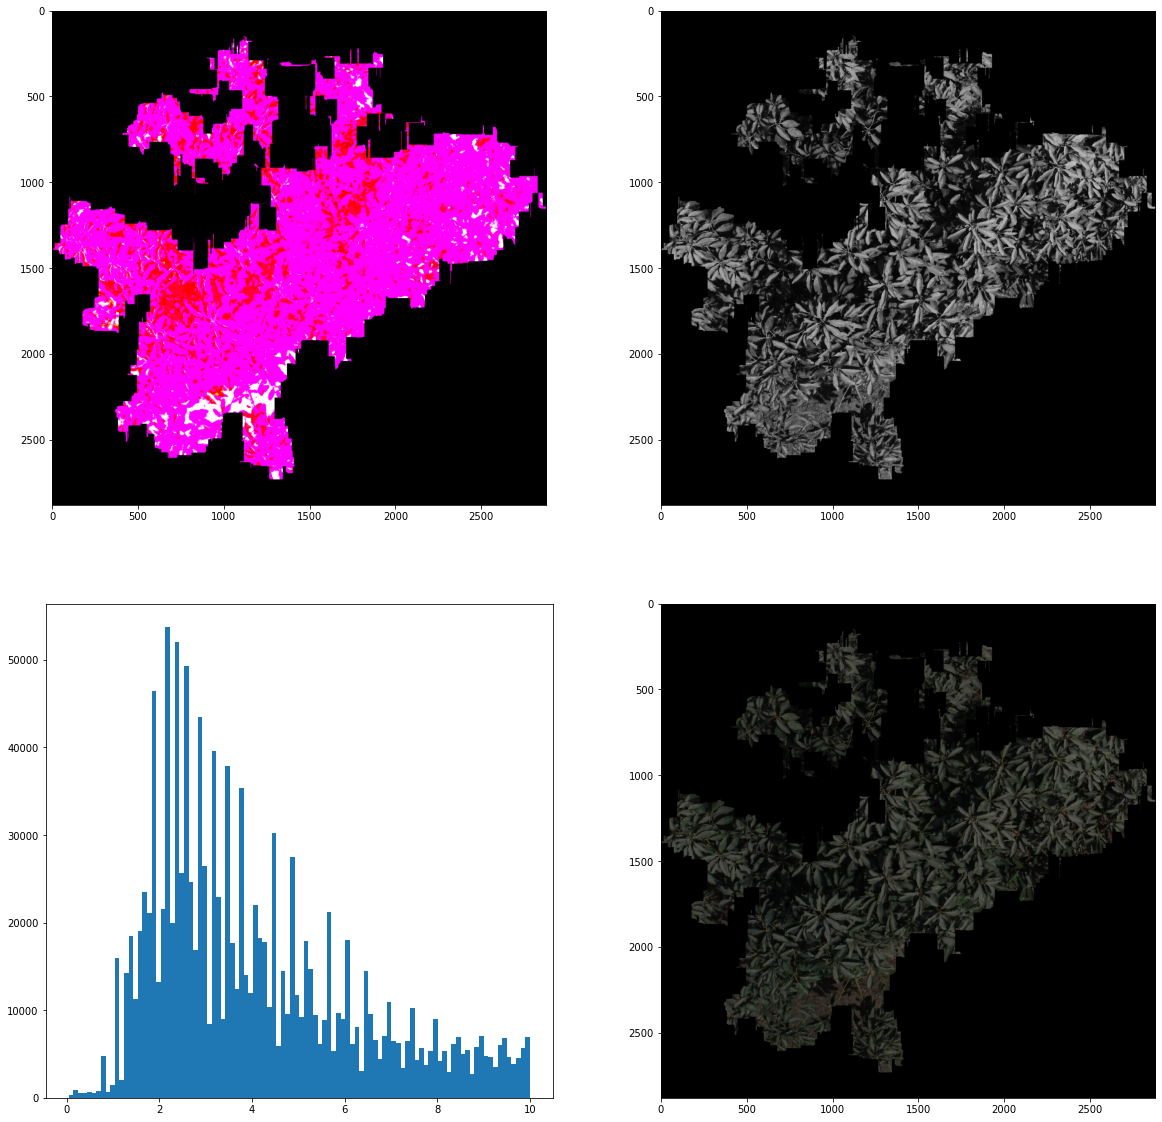

In [87]:
ID=8
img=datab_21_A[ID]['image']

print(datab_21_A.aID[ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img_hsv)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(img_hsv[:,:,0].ravel()[np.logical_and(img_hsv[:,:,0].ravel()>0.00001,img_hsv[:,:,0].ravel()<10)],bins=200)
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(img)

19_mayo_2_21_A.JPG


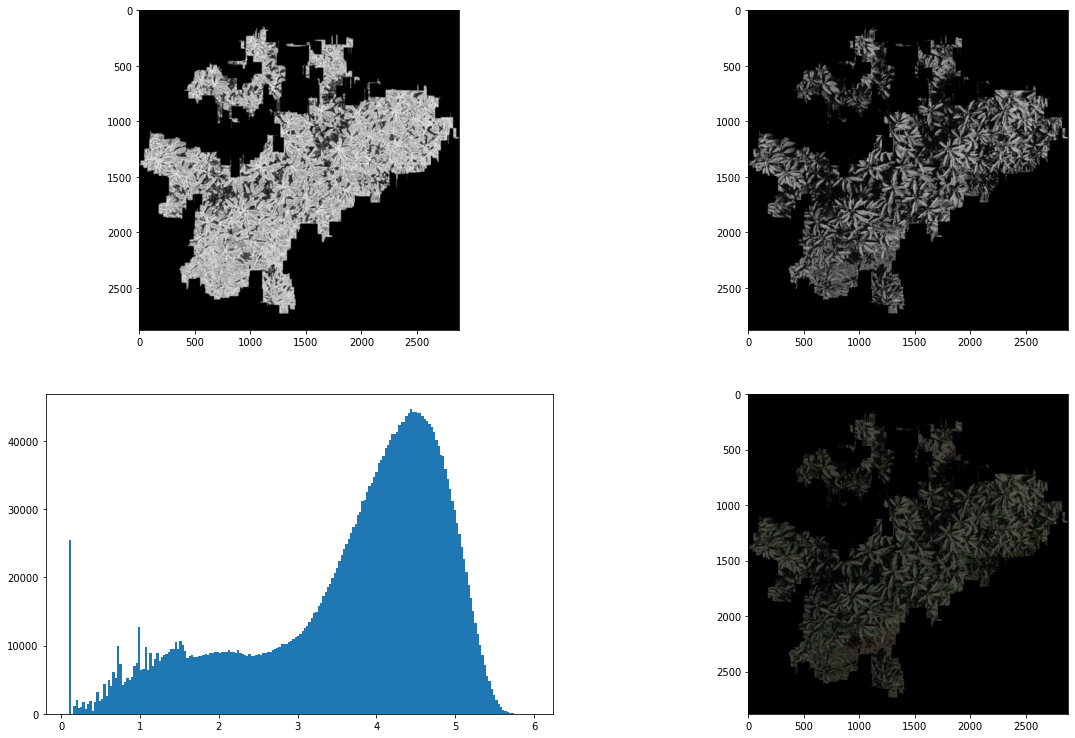

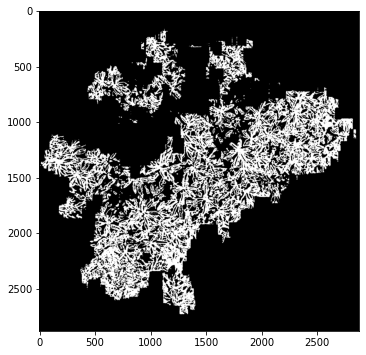

In [126]:
ID=8
img=datab_21_A[ID]['image']

print(datab_21_A.aID[ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))
ei=skimage.filters.rank.entropy(img_hsv[:,:,0]/128,skimage.morphology.disk(5))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(ei,cmap='gray')
ax = fig.add_subplot(3, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(3, 2, 3)
imgplot = plt.hist(ei.ravel()[ei.ravel()>0],bins=200)
ax = fig.add_subplot(3, 2, 4)
imgplot = plt.imshow(img)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 2, 5)

imgplot = plt.imshow(ei>4,cmap='gray')

12_mayo_2_1_A.JPG


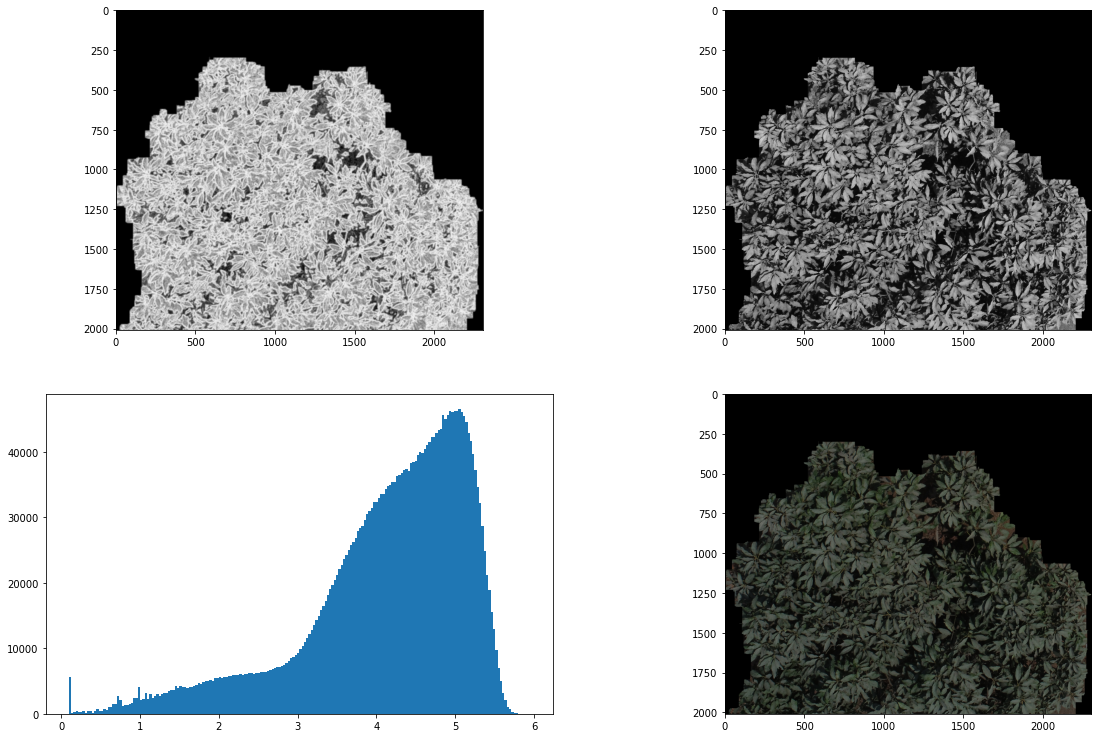

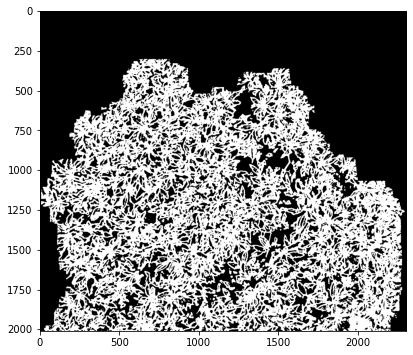

In [127]:
ID=2
img=datab_1_A[ID]['image']

print(datab_1_A.aID[ID])

#Tono verde-amarillo
img_hsv=skimage.color.rgb2lab(img.astype('uint8'))
ei=skimage.filters.rank.entropy(img_hsv[:,:,0]/128,skimage.morphology.disk(5))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(ei,cmap='gray')
ax = fig.add_subplot(3, 2, 2)
imgplot = plt.imshow(img_hsv[:,:,0],cmap='gray')
ax = fig.add_subplot(3, 2, 3)
imgplot = plt.hist(ei.ravel()[ei.ravel()>0],bins=200)
ax = fig.add_subplot(3, 2, 4)
imgplot = plt.imshow(img)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 2, 5)

imgplot = plt.imshow(ei>4,cmap='gray')